In [1]:
from pathlib import Path
import pandas as pd

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R

library('ggplot2')
library('ggpubr')
library('RColorBrewer')

![]('gel-data/2022-01-25_13h32m31s-Cas9-nickase-titration-enzyme-sgRNA.png')

In [4]:
samples = pd.read_csv('gel-data/SampleTable.csv')

In [5]:
samples[0:3]

,Nuclease free H20,10X NEBuffer r3.1 Reaction Buffer,sgRNA species,Diluted sgRNA volume (ul),sgRNA Relative concentration,EnGen Spy Cas9 Nickase (ul),Template Volume (ul),Cas9 Titration (X),sgRNA_concentration,Cas9_concentration,Lane
0,19.747423,3,pFC9VR13Cas9-4,5,1,1.6,0.652577,1,30,30,1
1,19.747423,3,pFC9VR13Cas9-4,5,1,1.6,0.652577,2,30,60,2
2,19.747423,3,pFC9VR13Cas9-4,5,1,1.6,0.652577,5,30,150,3


In [6]:
quant = pd.read_csv('gel-data/2022-01-25_13h32m31s-Cas9-nickase-titration-enzyme-sgRNA.csv', skiprows=1)

Bands are quantified relative to pFC9 (last lane of gel)

In [7]:
quant[0:3]

,Lane,Band No.,Band Label,Mol. Wt. (KDa),Relative Front,Adj. Volume (Int),Volume (Int),Abs. Quant.,Rel. Quant.,Band %,Lane %
0,1,1,NaN,NaN,0.314286,1105104,1825602,NaN,0.840088,34.942475,34.198838
1,1,2,NaN,NaN,0.742857,2057534,3140512,NaN,1.564115,65.057525,63.672987
2,2,1,NaN,NaN,0.285714,728962,1321212,NaN,0.554149,34.045159,33.233370


Remove last two lanes; these are both pFC9 only.

In [8]:
titration_lanes = quant.loc[quant['Lane'] < 17]

In [9]:
nicked_prop = []
for each_lane in range(1, len(set(titration_lanes['Lane']))+1):
    bands = titration_lanes.loc[titration_lanes['Lane'] == each_lane]
    percent = list(bands['Lane %'])
    nicked_prop.append(
        {
            'Lane': each_lane,
            'Nicked_Prop': percent[0]
            
        }
    
    )
nicked_prop = pd.DataFrame(nicked_prop)

In [10]:
nicked_prop

,Lane,Nicked_Prop
0,1,34.198838
1,2,33.233370
2,3,14.322953
3,4,6.101078
4,5,68.034773
5,6,58.924405
6,7,40.718065
7,8,23.382722
8,9,89.482768
9,10,85.080451


In [11]:
label_nicked = pd.DataFrame.merge(nicked_prop, samples, on='Lane')
label_nicked

,Lane,Nicked_Prop,Nuclease free H20,10X NEBuffer r3.1 Reaction Buffer,sgRNA species,Diluted sgRNA volume (ul),sgRNA Relative concentration,EnGen Spy Cas9 Nickase (ul),Template Volume (ul),Cas9 Titration (X),sgRNA_concentration,Cas9_concentration
0,1,34.198838,19.747423,3,pFC9VR13Cas9-4,5,1,1.6,0.652577,1,30,30
1,2,33.233370,19.747423,3,pFC9VR13Cas9-4,5,1,1.6,0.652577,2,30,60
2,3,14.322953,19.747423,3,pFC9VR13Cas9-4,5,1,1.6,0.652577,5,30,150
3,4,6.101078,19.747423,3,pFC9VR13Cas9-4,5,1,1.6,0.652577,10,30,300
4,5,68.034773,19.747423,3,pFC9VR13Cas9-4,5,2,1.6,0.652577,1,60,30
5,6,58.924405,19.747423,3,pFC9VR13Cas9-4,5,2,1.6,0.652577,2,60,60
6,7,40.718065,19.747423,3,pFC9VR13Cas9-4,5,2,1.6,0.652577,5,60,150
7,8,23.382722,19.747423,3,pFC9VR13Cas9-4,5,2,1.6,0.652577,10,60,300
8,9,89.482768,19.747423,3,pFC9VR13Cas9-4,5,5,1.6,0.652577,1,150,30
9,10,85.080451,19.747423,3,pFC9VR13Cas9-4,5,5,1.6,0.652577,2,150,60


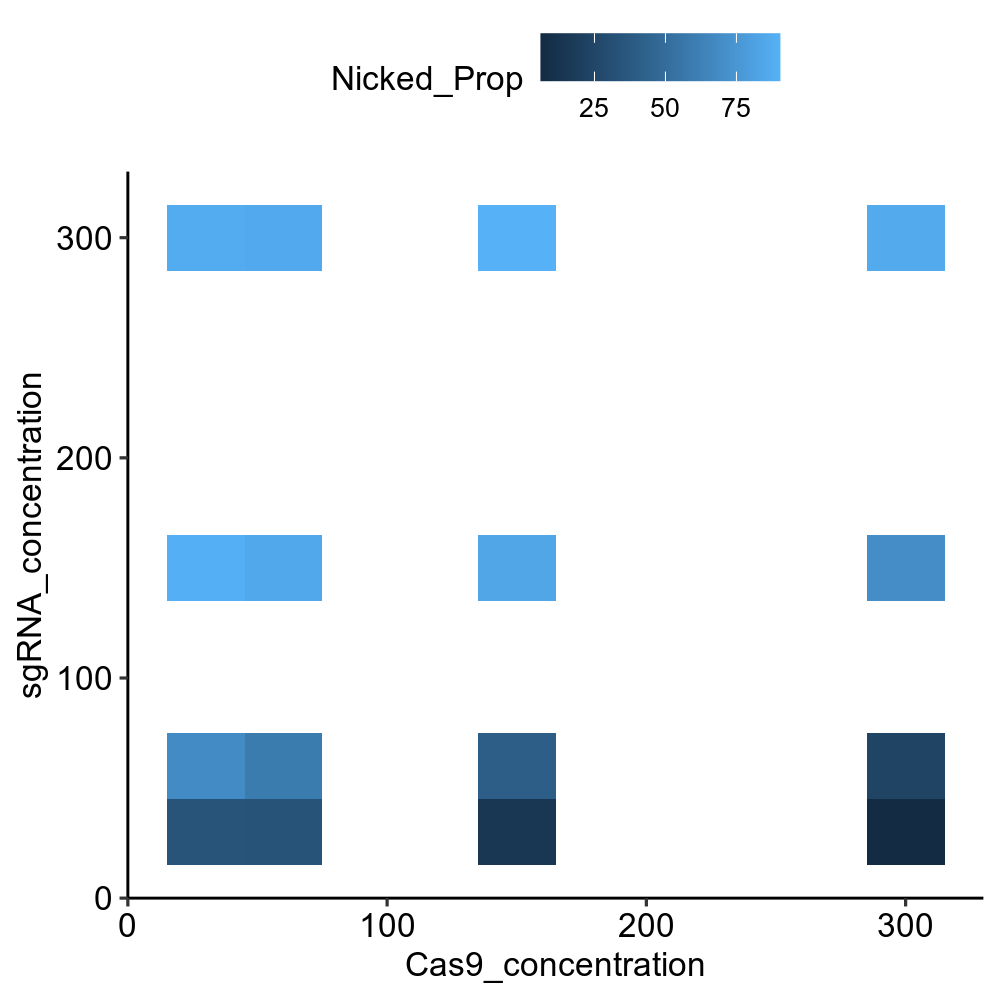

In [12]:
%%R -i label_nicked -w 5 -h 5 --units in -r 200


ggplot(label_nicked, 
       aes(
           fill=Nicked_Prop, 
           x=Cas9_concentration,
           y=sgRNA_concentration)
      ) + geom_tile() + theme_pubr()

In [13]:
%%R -i label_nicked -w 8 -h 7 --units in -r 200


a <- ggplot(label_nicked, 
       aes(
           y=Nicked_Prop, 
           x=Cas9_concentration,
           )
      ) + geom_line() + 
      geom_point(color='tan') +
      facet_wrap(~sgRNA_concentration) + 
      theme_pubr() +
      labs(x='Cas9 (nM)', y='% Template Nicked', title='Cas9 nicking efficiency by sgRNA concentration (nM)')

In [14]:
%%R -i label_nicked -w 8 -h 7 --units in -r 200


b <- ggplot(label_nicked, 
       aes(
           y=Nicked_Prop, 
           x=sgRNA_concentration,
           )
      ) + geom_line() + 
      facet_wrap(~Cas9_concentration) + 
      geom_point(color='dodgerblue') + 
      theme_pubr() +
      labs(x='sgRNA (nM)', y='% Template Nicked', title='Cas9 nicking efficiency by Cas9 concentration (nM)')


In [15]:
%%R -i label_nicked -w 12 -h 5 --units in -r 600

plot <- ggarrange(a, b)

In [16]:
%%R 
ggsave('sgRNAvsCas9TitrationPlot.png', plot, width=12, height=5, dpi=600)

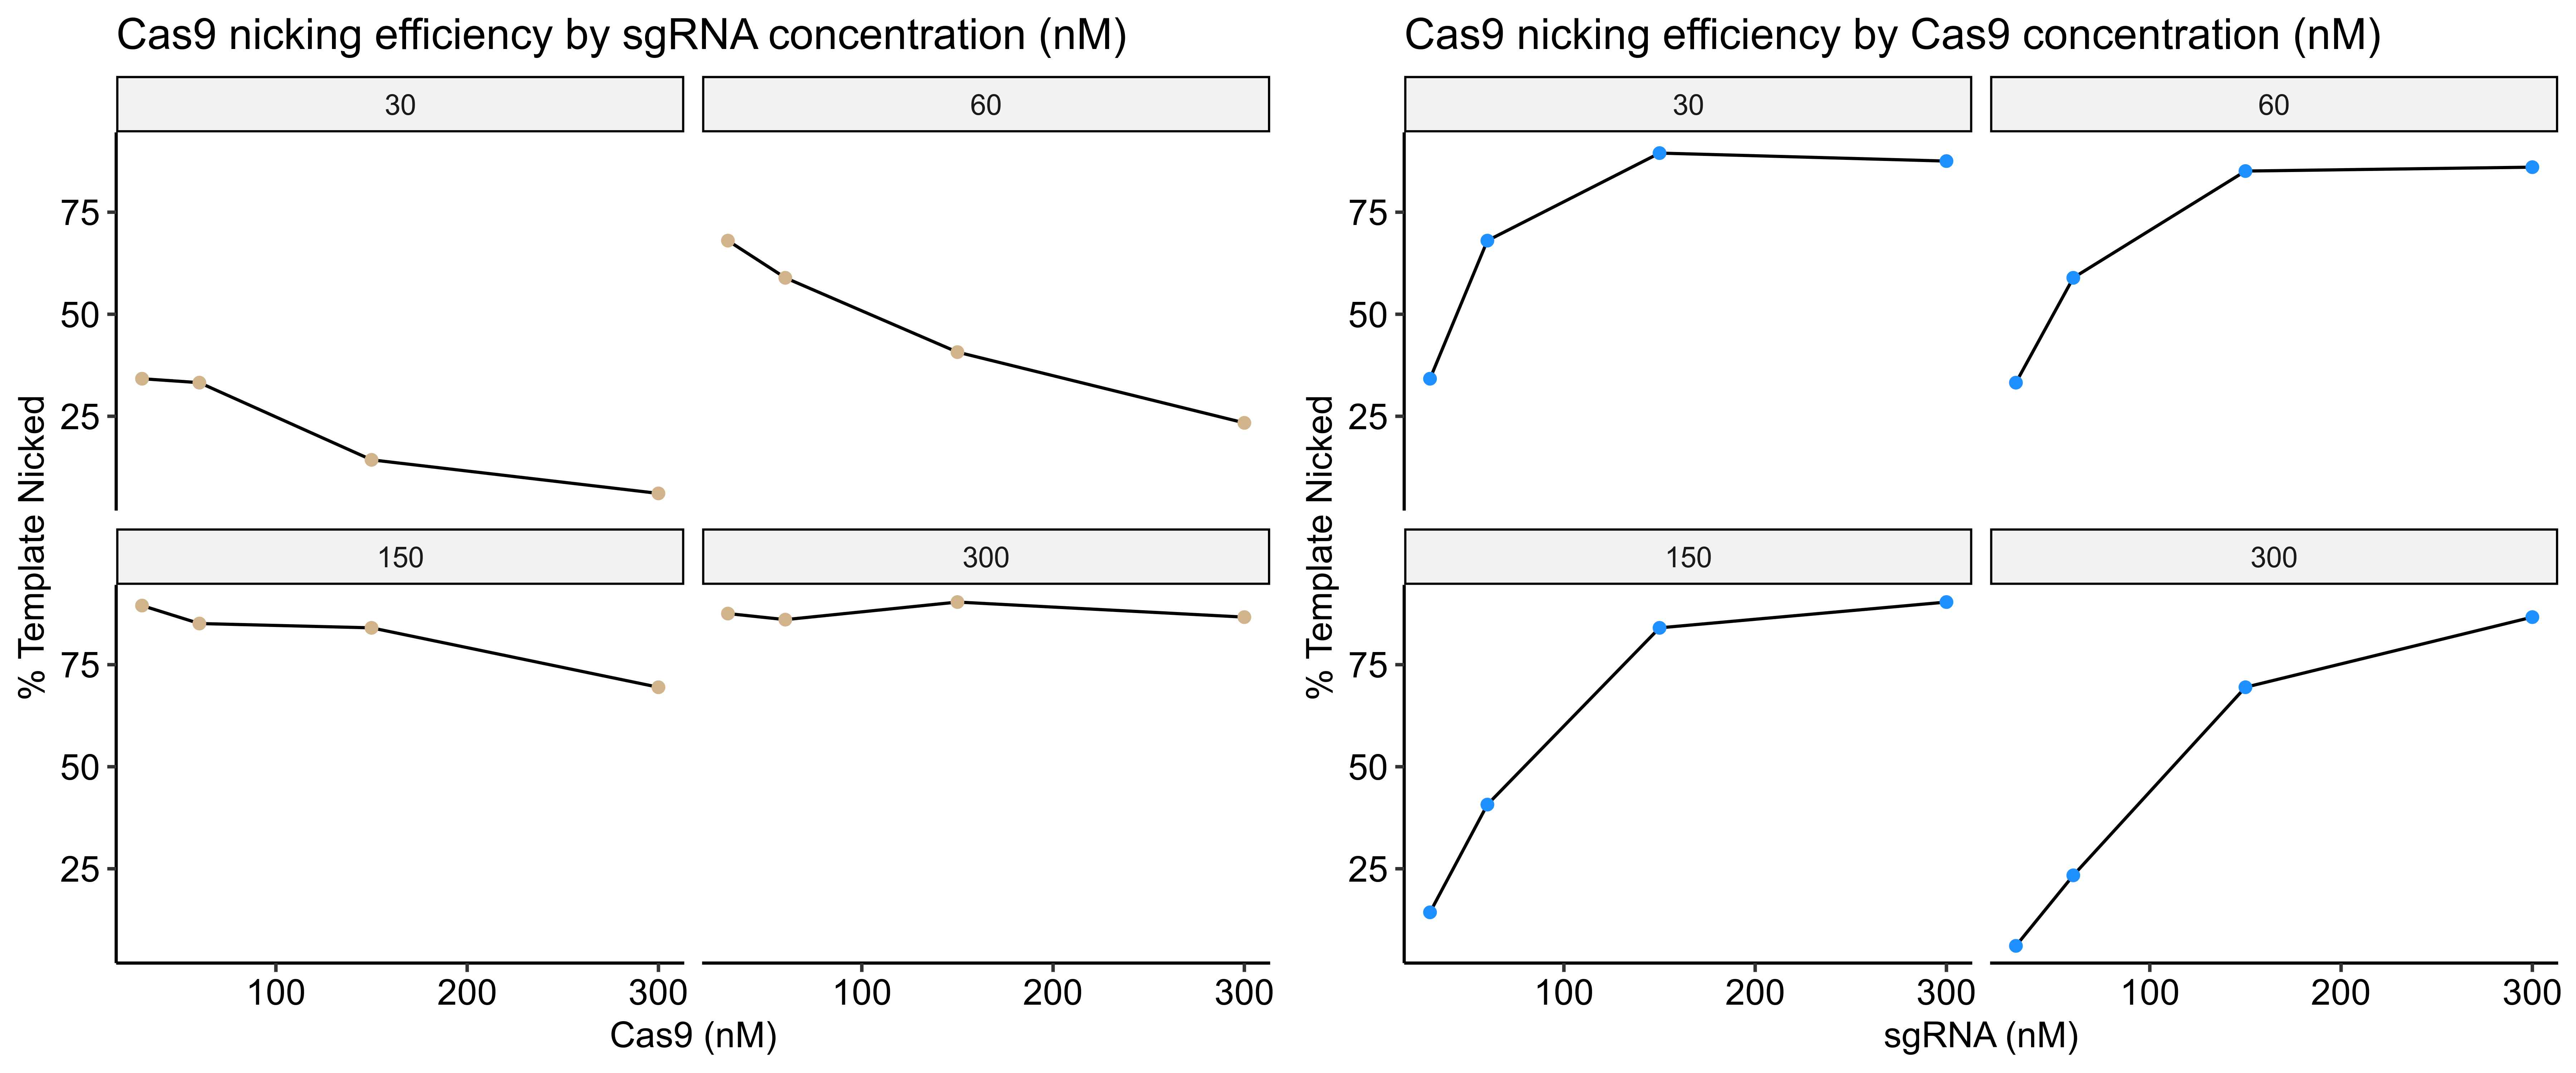

In [17]:
%%R -w 12 -h 5 --units in -r 600
plot